In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
sorted(os.listdir('f1_race_data'))

['circuits.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'constructors.csv',
 'driver_standings.csv',
 'drivers.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [2]:
circuits = pd.read_csv('f1_race_data/circuits.csv')
constructor_results = pd.read_csv('f1_race_data/constructor_results.csv')
constuctor_standings = pd.read_csv('f1_race_data/constructor_standings.csv')
constructors = pd.read_csv('f1_race_data/constructors.csv')
driver_standings = pd.read_csv('f1_race_data/driver_standings.csv')
drivers = pd.read_csv('f1_race_data/drivers.csv')
lap_times = pd.read_csv('f1_race_data/lap_times.csv')
pit_stops = pd.read_csv('f1_race_data/pit_stops.csv')
qualifying = pd.read_csv('f1_race_data/qualifying.csv')
races = pd.read_csv('f1_race_data/races.csv')
driver_standings = pd.read_csv('f1_race_data/driver_standings.csv')
results = pd.read_csv('f1_race_data/results.csv')
seasons = pd.read_csv('f1_race_data/seasons.csv')
sprint_results = pd.read_csv('f1_race_data/sprint_results.csv')
status = pd.read_csv('f1_race_data/status.csv')


In [3]:
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']
results_df = results.merge(drivers[['driverId', 'full_name']], on='driverId', how='inner').drop('driverId', axis=1).merge(
                constructors[['constructorId', 'name']], how='inner', on='constructorId').drop('constructorId', axis=1)\
                .rename({'full_name':'driver', 'name':'constructor'}, axis=1).merge(races[['year', 'name', 'raceId','date']], how='inner', on='raceId')\
                .drop('raceId', axis=1).rename({'name':'race'}, axis=1)
results_df = results_df.replace({'\\N': np.nan})
results_df['date'] = pd.to_datetime(results_df['date'])
results_df[(results_df['driver'] == 'Robert Kubica') & (pd.to_numeric(results_df['position']) <= 3)].sort_values('date', ascending=True)
# results_df[(results_df['driver'] == 'Robert Kubica') & (pd.to_numeric(results_df['year']) == 2008)].sort_values('date', ascending=True)

,resultId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver,constructor,year,race,date
4385,1053,17,6,3,3,3,6.0,53,+26.414,4518389,21,4,1:23.111,250.927,1,Robert Kubica,BMW Sauber,2006,Italian Grand Prix,2006-09-10
25,24,4,4,2,2,2,8.0,56,+19.570,5498125,39,6,1:35.921,208.033,1,Robert Kubica,BMW Sauber,2008,Malaysian Grand Prix,2008-03-23
47,47,4,1,3,3,3,6.0,57,+4.998,5471968,55,5,1:33.775,207.765,1,Robert Kubica,BMW Sauber,2008,Bahrain Grand Prix,2008-04-06
111,110,4,5,2,2,2,8.0,76,+3.064,7245806,75,5,1:17.933,154.286,1,Robert Kubica,BMW Sauber,2008,Monaco Grand Prix,2008-05-25
131,129,4,2,1,1,1,10.0,70,1:36:24.227,5784227,47,4,1:17.539,202.473,1,Robert Kubica,BMW Sauber,2008,Canadian Grand Prix,2008-06-08
231,231,4,3,3,3,3,6.0,57,+37.353,5769692,38,4,1:39.330,196.399,1,Robert Kubica,BMW Sauber,2008,European Grand Prix,2008-08-24
271,271,4,11,3,3,3,6.0,53,+20.471,5227965,52,12,1:30.298,230.955,1,Robert Kubica,BMW Sauber,2008,Italian Grand Prix,2008-09-14
311,310,4,6,2,2,2,8.0,67,+5.283,5427175,16,7,1:19.292,207.168,1,Robert Kubica,BMW Sauber,2008,Japanese Grand Prix,2008-10-12
1045,7855,5,8,2,2,2,8.0,71,+7.626,5550707,38,4,1:14.155,209.188,1,Robert Kubica,BMW Sauber,2009,Brazilian Grand Prix,2009-10-18
1114,20348,11,9,2,2,2,18.0,58,+12.034,5628565,52,8,1:29.570,213.138,1,Robert Kubica,Renault,2010,Australian Grand Prix,2010-03-28


In [86]:
races[races['year'] == 2008]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
17,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
18,19,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
19,20,2008,3,3,Bahrain Grand Prix,2008-04-06,11:30:00,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
20,21,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
21,22,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22,23,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
23,24,2008,7,7,Canadian Grand Prix,2008-06-08,17:00:00,http://en.wikipedia.org/wiki/2008_Canadian_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
24,25,2008,8,8,French Grand Prix,2008-06-22,12:00:00,http://en.wikipedia.org/wiki/2008_French_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
25,26,2008,9,9,British Grand Prix,2008-07-06,12:00:00,http://en.wikipedia.org/wiki/2008_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
26,27,2008,10,10,German Grand Prix,2008-07-20,12:00:00,http://en.wikipedia.org/wiki/2008_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [125]:
def calculate_time(driver, time):
    print(time)
    return time

In [4]:
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']
lap_times_df = lap_times.merge(drivers[['driverId', 'full_name']], on='driverId', how='inner').drop('driverId', axis=1).rename({'full_name': 'driver'}, axis=1)
lap_times_df = lap_times_df[lap_times_df['raceId'] == 24].sort_values(['driver', 'lap']).reset_index()
# df['Sum_Cummulative']=df.groupby(df['Name'].eq('AAAA').cumsum())['Number'].cumsum()
lap_times_df['relative_time'] = (lap_times_df.merge(lap_times_df.groupby(lap_times_df["lap"]).mean()['milliseconds'], on='lap').sort_values(['driver', 'lap']).reset_index()['milliseconds_y'] -\
lap_times_df.merge(lap_times_df.groupby(lap_times_df["lap"]).mean()['milliseconds'], on='lap').sort_values(['driver', 'lap']).reset_index()['milliseconds_x'])/1000
lap_times_df['total_time'] = lap_times_df.groupby(lap_times_df["driver"]).cumsum()['relative_time']
lap_times_df

,index,raceId,lap,position,time,milliseconds,driver,relative_time,total_time
0,121369,24,1,16,1:36.053,96053,Adrian Sutil,-3.237850,-3.237850
1,121370,24,2,16,1:23.267,83267,Adrian Sutil,-1.414700,-4.652550
2,121371,24,3,16,1:22.086,82086,Adrian Sutil,-1.196700,-5.849250
3,121372,24,4,16,1:20.857,80857,Adrian Sutil,-0.476100,-6.325350
4,121373,24,5,16,1:21.605,81605,Adrian Sutil,-1.168700,-7.494050
...,...,...,...,...,...,...,...,...,...
1135,172321,24,66,4,1:20.774,80774,Timo Glock,-0.818769,10.959601
1136,172322,24,67,4,1:20.377,80377,Timo Glock,-0.259231,10.700370
1137,172323,24,68,4,1:22.521,82521,Timo Glock,-1.696077,9.004293
1138,172324,24,69,4,1:19.725,79725,Timo Glock,1.910000,10.914293


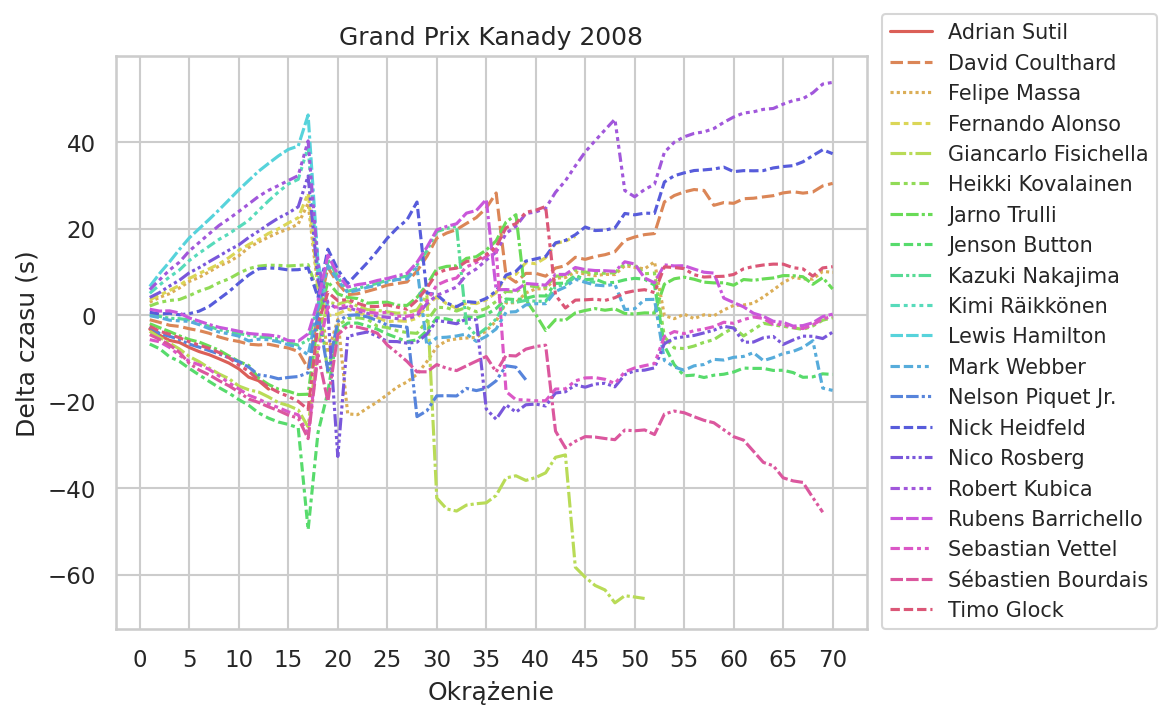

In [12]:
plt.figure(figsize=(8,5),dpi=150)
sns.set(style="whitegrid")
sns.lineplot(data=lap_times_df, x='lap', y='total_time', hue='driver', style='driver', palette='hls')
plt.legend(loc=(1.02, 0), prop={'size': 10})
# plt.yticks(range(1, len(lap_times_df['driver'].unique())+1))
plt.xticks(range(0, lap_times_df['lap'].max()+1, 5))
plt.title('Grand Prix Kanady 2008')
plt.ylabel('Delta czasu (s)')
plt.xlabel('Okrążenie')
plt.tight_layout()
plt.savefig('exported_images/CanGP2008.png', bbox_inches='tight', dpi=150, transparent=False)
